In [1]:
import sys
import os
sys.path.append(os.path.abspath('../scripts'))
from loader import load_news_data
import matplotlib.pyplot as plt
import seaborn as sns
import talib             
import pynance as py  
import quantstats as qs 
import numpy as np
import pandas as pd


df = load_news_data('../data/AAPL.csv')
print(df.head())
print(df.columns)

Loading data from ../data/AAPL.csv...
         Date     Close      High       Low      Open      Volume
0  2009-01-02  2.721686  2.730385  2.554037  2.575630   746015200
1  2009-01-05  2.836553  2.884539  2.780469  2.794266  1181608400
2  2009-01-06  2.789767  2.914229  2.770872  2.877641  1289310400
3  2009-01-07  2.729484  2.774170  2.706990  2.753477   753048800
4  2009-01-08  2.780169  2.793666  2.700393  2.712090   673500800
Index(['Date', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')


In [2]:
# Clean stock data

# Remove rows with missing values
data = df.dropna()

# Ensure correct data types
for col in ['Open','High','Low','Close','Volume']:
    data[col] = data[col].astype(float)

         count          mean           std           min           25%  \
Close   3774.0  5.384117e+01  5.506404e+01  2.345299e+00  1.505036e+01   
High    3774.0  5.438380e+01  5.562723e+01  2.459265e+00  1.518304e+01   
Low     3774.0  5.324746e+01  5.444013e+01  2.345299e+00  1.490189e+01   
Open    3774.0  5.380163e+01  5.500918e+01  2.380989e+00  1.500758e+01   
Volume  3774.0  2.640640e+08  2.345629e+08  2.404830e+07  9.581845e+07   

                 50%           75%           max  
Close   2.697581e+01  7.466420e+01  1.962566e+02  
High    2.716884e+01  7.525238e+01  1.977525e+02  
Low     2.683684e+01  7.355355e+01  1.951569e+02  
Open    2.701021e+01  7.412793e+01  1.961674e+02  
Volume  1.667348e+08  3.777410e+08  1.880998e+09  


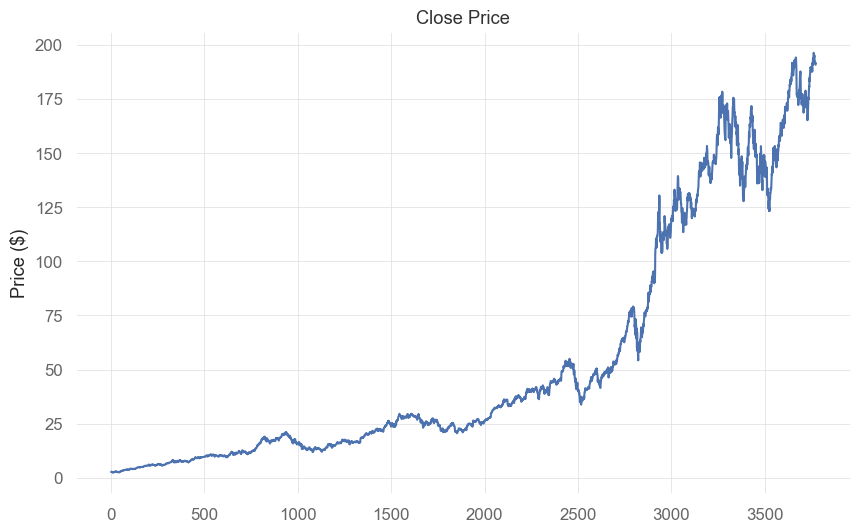

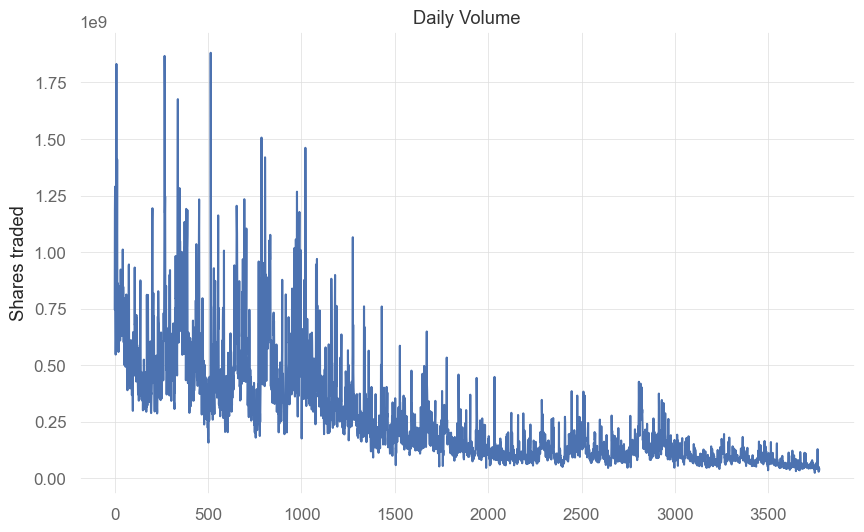

In [3]:
print(data.describe().T)

# Close price chart
data["Close"].plot(title="Close Price")
plt.ylabel("Price ($)")
plt.show()

# Volume chart
data["Volume"].plot(title="Daily Volume")
plt.ylabel("Shares traded")
plt.show()


In [4]:

if "Adj Close" in data.columns:
    price = data["Adj Close"]
else:
    price = data["Close"]

# --- Moving Averages ---
data["SMA_20"] = talib.SMA(price, timeperiod=20)
data["SMA_50"] = talib.SMA(price, timeperiod=50)
data["EMA_20"] = talib.EMA(price, timeperiod=20)

# --- RSI ---
data["RSI_14"] = talib.RSI(price, timeperiod=14)

# --- MACD ---
data["MACD"], data["MACD_signal"], data["MACD_hist"] = talib.MACD(
    price, fastperiod=12, slowperiod=26, signalperiod=9
)



data.tail()

,Date,Close,High,Low,Open,Volume,SMA_20,SMA_50,EMA_20,RSI_14,MACD,MACD_signal,MACD_hist
3769,2023-12-22,191.788757,193.581821,191.164647,193.353962,37149600.0,191.856618,183.572859,191.510231,54.672784,2.633141,3.235256,-0.602115
3770,2023-12-26,191.243912,192.076049,191.025969,191.798670,28919300.0,192.018094,183.858864,191.484867,53.090049,2.304751,3.049155,-0.744404
3771,2023-12-27,191.342972,191.689703,189.302247,190.689158,48087700.0,192.154308,184.149424,191.471353,53.354446,2.029104,2.845145,-0.816041
3772,2023-12-28,191.768951,192.838849,191.362784,192.323710,34049900.0,192.362839,184.479567,191.499696,54.540999,1.823998,2.640915,-0.816918
3773,2023-12-29,190.728775,192.581275,189.936256,192.085953,42672100.0,192.490633,184.814828,191.426275,51.121347,1.559539,2.424640,-0.865101


In [5]:
from pynance import portfolio_optimizer as po

TICKERS = ["AAPL", "AMZN","GOOG","MSFT", "META", "NVDA"]

# Create the portfolio calculations object
portfolio = po.PortfolioCalculations(TICKERS)

print("=== Max Sharpe Portfolio (risk/return) ===")
print(portfolio.max_sharpe_portfolio("rr"))

print("\n=== Max Sharpe Portfolio weights ===")
print(portfolio.max_sharpe_portfolio("df").head())

print("\n=== Min Variance Portfolio (risk/return) ===")
print(portfolio.min_var_portfolio("rr"))

print("\n=== Min Variance Portfolio weights ===")
print(portfolio.min_var_portfolio("df").head())

c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if adj_close_data[-1] == 0:
c:\Users\Abenezer\Desktop\KAIM Project\nova-financial-analytics-week1\venv2\Lib\site-packages\pynance\datasources\data_retriever.py:19: FutureWarning: Series.__getitem__ treating keys as positions is depr

=== Max Sharpe Portfolio (risk/return) ===
                   Max Sharpe Portfolio
Expected Return                  61.96%
Standard Deviation               35.59%

=== Max Sharpe Portfolio weights ===
     Portfolio Weight
AAPL            0.00%
AMZN            0.00%
GOOG           47.22%
MSFT            0.00%
META            0.00%

=== Min Variance Portfolio (risk/return) ===
                   Min Var Portfolio
Expected Return               22.17%
Standard Deviation            20.03%

=== Min Variance Portfolio weights ===
     Portfolio Weight
AAPL           36.41%
AMZN            0.00%
GOOG           15.39%
MSFT           47.22%
META            0.98%


Price & Moving Averages


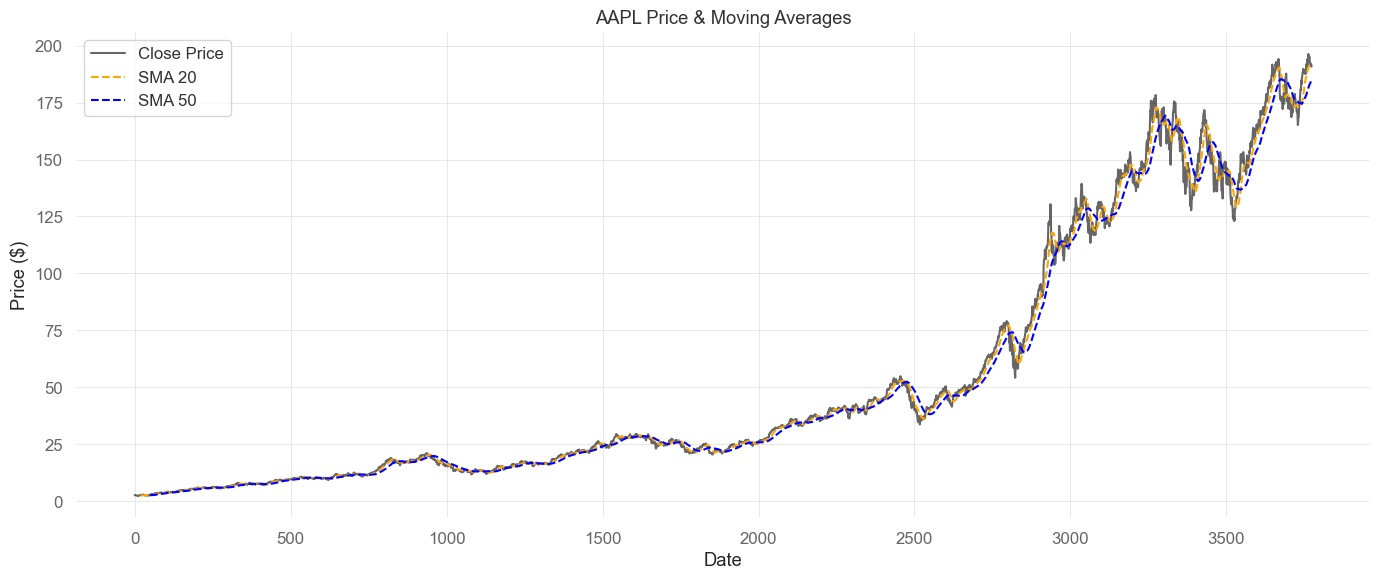

In [6]:

print("Price & Moving Averages")
plt.figure(figsize=(14, 6))
plt.plot(data.index, data['Close'], label='Close Price', color='black', alpha=0.6)
plt.plot(data.index, data['SMA_20'], label='SMA 20', color='orange', linestyle='--')
plt.plot(data.index, data['SMA_50'], label='SMA 50', color='blue', linestyle='--')

plt.title('AAPL Price & Moving Averages')
plt.ylabel('Price ($)')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

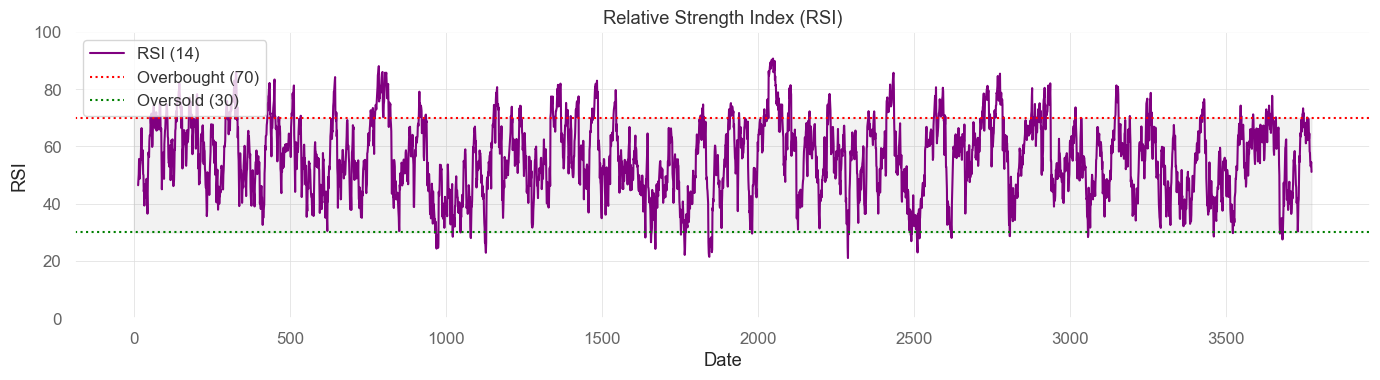

In [7]:
plt.figure(figsize=(14, 4))
plt.plot(data.index, data['RSI_14'], label='RSI (14)', color='purple')

# Add thresholds
plt.axhline(70, color='red', linestyle=':', label='Overbought (70)')
plt.axhline(30, color='green', linestyle=':', label='Oversold (30)')
plt.fill_between(data.index, 70, 30, color='gray', alpha=0.1)

plt.title('Relative Strength Index (RSI)')
plt.ylabel('RSI')
plt.xlabel('Date')
plt.ylim(0, 100)
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



Subplot 3: MACD


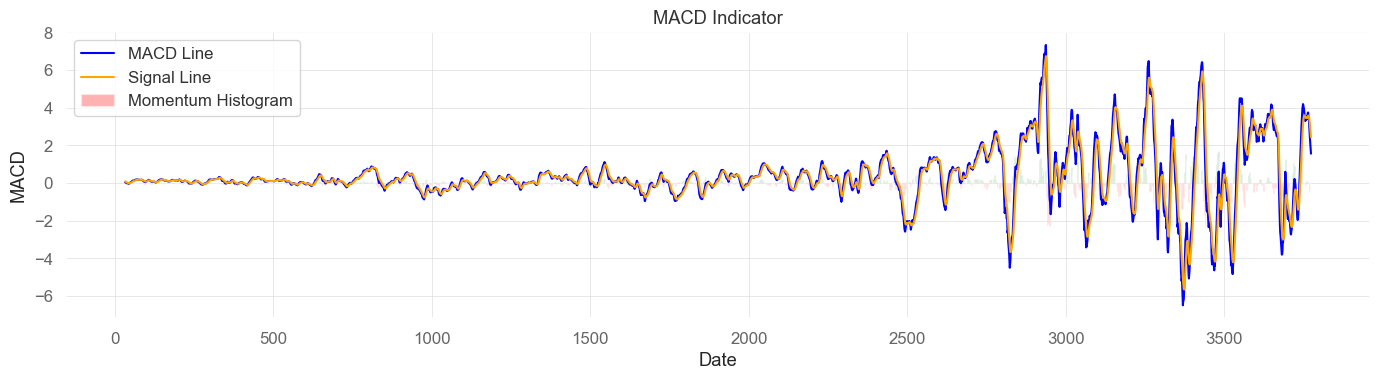

In [8]:
print("Subplot 3: MACD")

plt.figure(figsize=(14, 4))
plt.plot(data.index, data['MACD'], label='MACD Line', color='blue')
plt.plot(data.index, data['MACD_signal'], label='Signal Line', color='orange')

# Color histogram bars based on value
colors = ['green' if v >= 0 else 'red' for v in data['MACD_hist']]
plt.bar(data.index, data['MACD_hist'], color=colors, alpha=0.3, label='Momentum Histogram')

plt.title('MACD Indicator')
plt.ylabel('MACD')
plt.xlabel('Date')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()